# Predicting Churn Rates within Telco
by Caitlyn Carney

### Our goals:
1. Find that major drivers of customer churn within the company
2. create a model that predicts churn accuratly
3. Create a clean report of all work that is understandable by everyone.

### What will we be doing today?

1. **Acquiring our data**
    - can be found in acquire.py on github
2. **Preparing our data**
    - so much cleaning so little time
    - split data into train, validate, and test
    - fix any crazy data we have
        - *can all be found in prepare.py on github*
    - find an MVP
        - *minimal viable product*
    - split up features
        - *using dummy variables and concating them back in*
4. **Explore and Analyse the Data**
    - Answer key questions
    - Determine hypothesis
    - Visualizations
    - Run stat tests
5. **Model and Evaluation**
    - Establish Baseline accuracy
    - Train multipl models
    - Compare models and pick the BEST model
    - Test the model with out of sample data

# Lets Acquire our Data
- for more information on the functions used to gather the data please refer to the acquire.py found at:
https://github.com/CaitlynCarney/classification-project

In [ ]:
import acquire

In [ ]:
#make sure everything looks good
df = acquire.get_churn_data()
df.head()
# double check and make sure it was cleaned correctly

In [86]:
print(df.info())
print('-----------------------------------------------------------')
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7032 non-null   object 
 1   senior_citizen     7032 non-null   int64  
 2   partner            7032 non-null   int64  
 3   dependents         7032 non-null   int64  
 4   tenure             7032 non-null   int64  
 5   phone_service      7032 non-null   int64  
 6   multiple_lines     7032 non-null   int64  
 7   online_security    7032 non-null   int64  
 8   online_backup      7032 non-null   int64  
 9   device_protection  7032 non-null   int64  
 10  tech_support       7032 non-null   int64  
 11  streaming_tv       7032 non-null   int64  
 12  streaming_movies   7032 non-null   int64  
 13  paperless_billing  7032 non-null   int64  
 14  monthly_charges    7032 non-null   float64
 15  total_charges      7032 non-null   float64
 16  churn              7032 

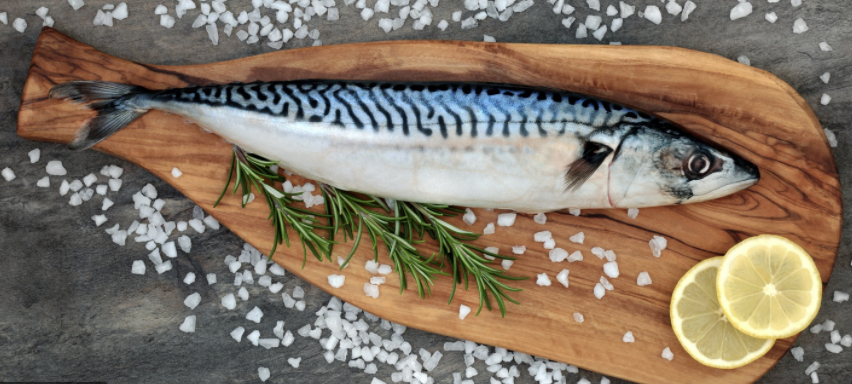

Holy mackerel! That's not helpful is it? Why dont we tidy that up!!

# Lets Prepare and Clean our Data!
- For more information on the functions used to gather the data please refer to the prepare.py found at:
https://github.com/CaitlynCarney/classification-project

In [87]:
import prepare

In [88]:
df = prepare.clean_telco(df)
df.head()

KeyError: "None of [Index(['internet_service_type', 'payment_type'], dtype='object')] are in the [columns]"

So much better!! All clean and tidy!

*What all did I do?*
- Change column form bool to interger where 0 stands for no/false and 1 stands for yes/true:
    - `'is_female'`
    
    - `'partner'`
    - `'dependents'`
    - `'phone_service'`
    - `'streaming_tv'`
    - `'streaming_movies'`
    - `'paperless_billing'`
    - `'churn'`
    - `'multiple_lines'`
    - `'online_security'`
    - `'online_backup'`
    - `'online_protection'`
    - `'tech_support'`
- Encode internet_service_type, payment_type into seperate new columns and add them to the df
- Removed columns: 
    - `'payment_type_id'`
    
    - `'internet_service_type_id'`
    - `'contract_type_id'`
    - `'customer_id'`
    - `'gender columns'`
    - `'contract_type'`
    - `'internet_service_type'`
    - `'payment_type'`
- Rename internet_service_type_DSL to DSL
- Rename internet_service_type_Fiber optic to fiber_optic
- Rename internet_service_type_None to no_internet
- Rename payment_type_Bank transfer (automatic) to bank_transfer
- Rename payment_type_Credit card (automatic) to credit_card
- Rename payment_type_Electronic check to electronic_check
- Rename payment_type_Mailed check to mailed_check
- Change columns to integer format instead of object or string: 
    - `'is_female'`
    
    - `'partner'`
    - `'dependents'`
    - `'phone_service'`
    - `'streaming_tv'`
    - `'streaming_movies'`
    - `'paperless_billing'`
    - `'churn'`
    - `'multiple_lines'`
    - `'online_security'`
    - `'online_backup'`
    - `'device_protections'`
    - `'tech_support'`
    - `'total_charges'`
- Return: a single pandas dataframe with the above operations performed

Because of the steps made I am left with no missing values or values needing to be changed.

# Lets Explore and Analyze this Data!

In [89]:
#imports for needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import pydataset
from scipy import stats

# ignoring warnings
import warnings
warnings.filterwarnings("ignore")

#imports for modeling
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
    #import to be able to do decision tress
from sklearn.neighbors import KNeighborsClassifier
    #import to be able to do KNN
from sklearn.linear_model import LogisticRegression
    #import to be able to do logistic regression
from sklearn.ensemble import RandomForestClassifier
    #import to be able to do random forest

#### Construct a figure with subplots of histograms of features

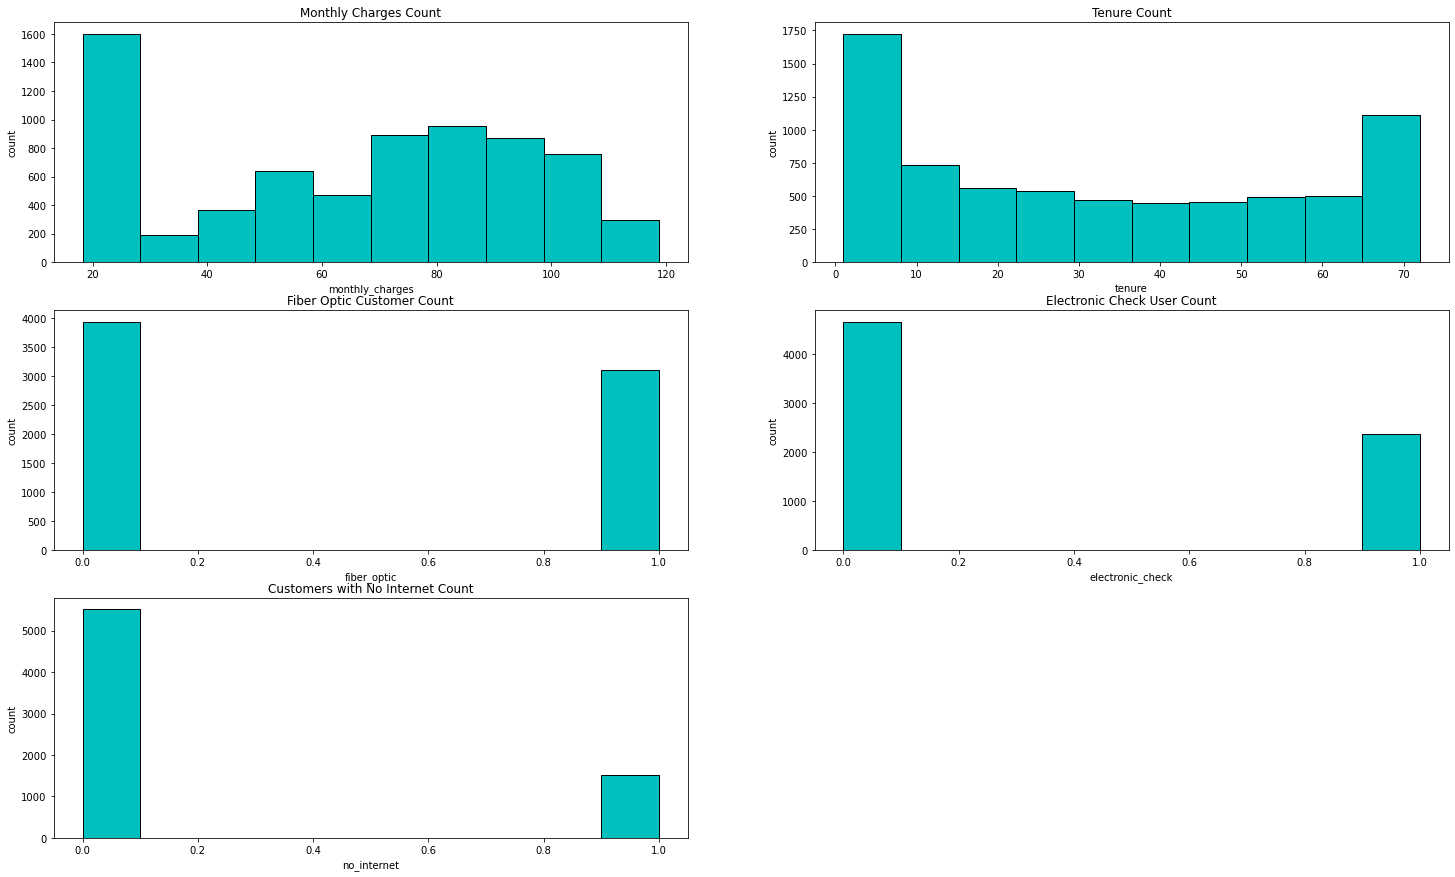

In [90]:
# sets size, can adjust to liking
plt.subplots(figsize=(25, 15))

# plt.subplot(rows,columns,sequence plotted)
plt.subplot(3,2,1);
line1 = plt.hist(df.monthly_charges, facecolor='c', align='mid',
        edgecolor='black')
#Add labels and titles
plt.title('Monthly Charges Count');
plt.xlabel('monthly_charges')
plt.ylabel('count')

plt.subplot(3,2,2);
line2 = plt.hist(df.tenure, facecolor='c', align='mid',
        edgecolor='black');
plt.title('Tenure Count')
plt.xlabel('tenure')
plt.ylabel('count');

plt.subplot(3,2,3);
line3 = plt.hist(df.fiber_optic, facecolor='c', align='mid',
        edgecolor='black');
plt.title('Fiber Optic Customer Count')
plt.xlabel('fiber_optic')
plt.ylabel('count');

plt.subplot(3,2,4);
line4 = plt.hist(df.electronic_check, facecolor='c', align='mid',
        edgecolor='black');
plt.title('Electronic Check User Count')
plt.xlabel('electronic_check')
plt.ylabel('count');

plt.subplot(3,2,5);
line4 = plt.hist(df.no_internet, facecolor='c', align='mid',
        edgecolor='black');
plt.title('Customers with No Internet Count')
plt.xlabel('no_internet')
plt.ylabel('count');

- I don't need to change any of the values because I changed all strings to integers in the prepare stage
- tenure and monthly_charges are floats
- fiber_optic, electronic_check, ad no_internet are integers.
    - 0 = no
    - 1 = yes

# Join me on the Exploration of a Lifetime!

#### Now lets split our df into train, test, and validate so we can move into creating our models!

In [91]:
train, test, validate = prepare.train_validate_test_split(df)
train.head()

,customer_id,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,total_charges,churn,DSL,fiber_optic,no_internet,bank_transfer,credit_card,electronic_check,mailed_check,is_female
6191,4393-OBCRR,0,0,0,3,1,0,0,0,0,...,71.20,0,0,0,1,0,0,0,1,1
1850,0839-JTCUD,0,1,1,66,1,1,1,1,1,...,5958.85,0,1,0,0,0,1,0,0,1
5438,8207-DMRVL,0,1,1,72,1,1,1,1,1,...,8306.05,0,0,1,0,1,0,0,0,0
2171,6253-GNHWH,0,1,1,71,1,1,1,1,1,...,5224.95,0,1,0,0,0,0,0,1,1
6458,0847-HGRML,0,0,1,62,1,0,0,0,0,...,1250.10,0,0,0,1,1,0,0,0,0


### I am primarily looking at 5 different columns:
- monthly_charges
    - Continueous data
- tenure
    - Continueous data
- fiber_optic
    - Categorical data
- electronic_check
    - Categorical data
- no_internet
    - Categorical data

Text(0.5, 1.0, 'Correlation Heatmap')

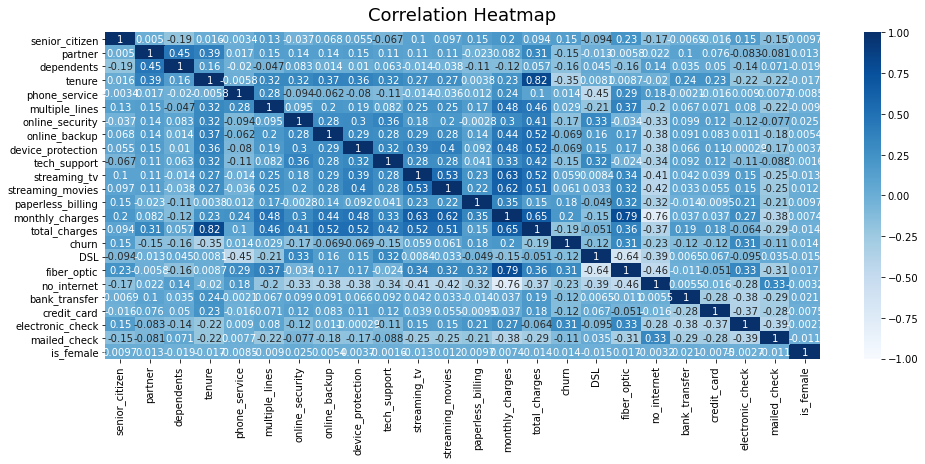

In [76]:
plt.figure(figsize=(16, 6))
corr_map = sns.heatmap(train.corr(), cmap="Blues", vmin=-1, vmax=1, annot=True)
corr_map.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)
# '-' (negative) is still correlation but is downward slope not upward

### To see correlation I decided to go with a heatmap to see the correlation between each column with churn
- In the correlation heatmap:
    - the darked the color the stronger the correlation is
    - the lighter the color the weaker the correlation is
- I chose to work with the 5 columns I did because of the correlation they had with churn. I picked the 5 with the largest correlation weither that be in an upward or downward slope.
- The features with the highest correlation to churn are:
    - monthly charges
        - with a positive correlation of: 0.2
        - this is a continous feature
    - tenure
        - wiht a negative correlation of: -0.35
        - this is a continous featue
    - fiber optic service
        - with a positive correlation of : 0.31
        - this is a categorical feature
    - electronic check payment
        - with a positive correlation of: 0.3
        - this is a categorical feature
    - no internet service
        - wiht a negative correlation of: -.23
        - this is a categorical feature

# Monthly Charges:
- If monthly charges are higher does the churn increase as well?
    - If so at what rate can we see a spike in churn?
    - Does the spike drop again after the spike or does it continue to grow?
    
- My Null Hypothesis is that "Monthly Charges and churn are independent variables and do not effect one another"
- My Alternative Hypothesis is that "Monthly Charges and churn are dependent of one another"
    - because according to my correlation heatmap there is a positive correlation of 0.2 I am led to believe that I will reject my null hypothesis and move forward with my alternative hypothesis.

In [92]:
# t test is for catigorical vs continous
null_hypothesis = "Monthly Charges and churn are independent variables and do not effect one another"
alt_hypothesis = "Monthly Charges and churn are dependent of one another"
alpha = .05 #my confident if 0.95 therfore my alpha is .05

#compare churned and not churned
churned = train[train.churn == 1]
not_churned = train[train.churn == 0]

# we are using 2 sample b/c we are comparing 2 subgroups not 1 subgroup and whole 
    # single tail, b/c checking which one is higher
t, p = stats.ttest_ind(churned.monthly_charges, not_churned.monthly_charges, nan_policy='omit')
#p/2 along with t > 0 is how we compare means if higher
if p < alpha: 
    print("Reject the null hypothesis")
    print("We move forward wiht the alternative hypothesis: ", alt_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("We move forwad wiht the null hypothesis:", null_hypothesis)
        #in enlgish this mean that there is not sufficient evidence

Reject the null hypothesis
We move forward wiht the alternative hypothesis:  Monthly Charges and churn are dependent of one another


#### Above I can see I was correct in thinking that we would reject the null hypothesis that monthly Charges and churn are independent variables and do not effect one another.

Text(0.5, 1.0, 'Count of Churned and Not Churned for Monthly Charges')

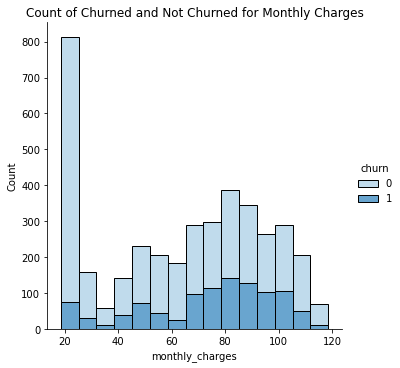

In [93]:
# visualize monthly charges that have churned
sns.displot(train, x="monthly_charges",hue="churn", multiple='stack', palette="Blues")

plt.title('Count of Churned and Not Churned for Monthly Charges')

- For this I used the **t testing** because I was comparing 1 continuous variable (monhtly charges) and 1 categorical variable (chunr)
- There is a **spike** in churn once rates hit 70 dollars per month and drop back off again at about 110 dollars per month

# Tenure
- Do we loose more people early on or later in their tenure?
- My Null Hypothesis is that "Tenure and churn rate are independent form one another"
- My Alternative Hypothesis is that "Tenure and chrun are dependent on each other"
    - because my correlation heatmap there is a negative correlation of -0.35, I am led to believe that the null hypothesis will be rejected.

In [ ]:
# t test is for catigorical vs continous
null_hypothesis = "Tenure and churn rate are independent form one another"
alt_hypothesis = "Tenure and chrun are dependent on each other"
alpha = .01 #my confident if 0.95 therfore my alpha is .05

#compare churned and not churned
churned = train[train.churn == 1]
not_churned = train[train.churn == 0]

# we are using 2 sample b/c we are comparing 2 subgroups not 1 subgroup and whole 
    # single tail, b/c checking which one is higher
t, p = stats.ttest_ind(churned.tenure, not_churned.tenure, nan_policy='omit')
#p/2 along with t > 0 is how we compare means if higher
if p < alpha: 
    print("Reject the null hypothesis")
    print("We move forward wiht the alternative hypothesis: ", alt_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("We move forwad wiht the null hypothesis:", null_hypothesis)
        #in enlgish this mean that there is not sufficient evidence

#### From my hypothesis testing we see the null hypothesis was in fact rejected, meaning that tenure and churn are dependent on each other.

In [ ]:
# visualize tenure that have churned
sns.displot(train, x="tenure",hue="churn", multiple='stack', palette="Blues")
plt.title('Count of Churned and Not Churned for Tenure')

- For this I used the **t testing** because I was comparing 1 continuous variable (monhtly charges) and 1 categorical variable (chunr)
- There is a significantly higher amount of customers who churn in the **first 10 months** of services versus any other level of tenure.

# Fiber Optic
- Do more fiber optic owners churn than not?
- My Null Hypothesis is that "Fiber optic ownership and churn are each independent from each other"
- My Alternative Hypothesis is that "Fiber Optic and churn have a relationship"
    - because my correlation heatmap there is a positive correlation of 0.31, I am am in the opinion that the null hypothesis will be rejected, and we will move forward with the alternative hypothesis.

In [26]:
observe = pd.crosstab(train.churn, train.fiber_optic, margins = True)
chi2, p, degf, expected = stats.chi2_contingency(observe)
    # observed: 0.85 - expected: 0.73
    # observed: 0.58 - expected: 0.73
    # observed: 0.74 - expected: 0.73
    # observed: 0.14 - expected: 0.27
    # observed: 0.42 - expected: 0.27
    # observed: 0.26 - expected: 0.27
    # p = 2.58
null_hypothesis = "Fiber optic ownership and churn are each independent from each other"
alt_hypothesis = "Fiber Optic and churn have a relationship"
alpha = .05 #my confident if 0.95 therfore my alpha is .05

if p < alpha:
    print("We reject the null hypothesis")
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("There is not enough evidence to move forward with the alternative hypothesis")

We reject the null hypothesis
We reject the hypothesis that Fiber optic ownership and churn are each independent from each other


#### From my chi squared test we see the null hypothesis was rejected, and we will be moving forward with my alternative hypothesis.

Text(0.5, 1.0, 'Count of Churned Fiber Optic Owners')

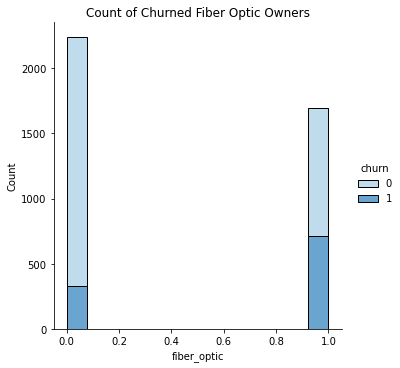

In [27]:
# visualize fiber optic customers that have churned
sns.displot(train, x="fiber_optic",hue="churn", multiple='stack', palette="Blues")
plt.title('Count of Churned Fiber Optic Owners')

- For this I used the chi test because I was comparing 2 categorical variables (fiber optic and churn)
    - 905 out of 2,170 customers with fiber optics churn
        - 41.7%
- Of the fiber optic customers we loose just a little less than we keep.
- Fiber optic customers pay between 70 and 100 a month
    - Which is where our churn spikes in our monthly charges.

# Electronic Check
- Does paying with an electronic check indicated if a customer has a higher chance of churning?
- My Null Hypothesis is that "Paying with an electronic check and churn rate are independent for each other"
- My Alternative Hypothesis is that "Paying with an electronic check and churn are dependent on each other"
    - after looking at the correlation heatmap I see that there is a positive correlation of 0.3, because of this I think we will reject the null hypothesis that fiber optics and churn are independent of each other.

In [28]:
observe = pd.crosstab(train.churn, train.electronic_check, margins = True)
chi2, p, degf, expected = stats.chi2_contingency(observe)
    # observed: 0.83 - expected: 0.71
    # observed: 0.55 - expected: 0.71
    # observed: 0.74 - expected: 0.71
    # observed: 0.17 - expected: 0.29
    # observed: 0.44 - expected: 0.29
    # observed: 0.26 - expected: 0.29
    # p = 2.436
# Chi test is for catigorical vs catigorical
null_hypothesis = "Paying with an electronic check and churn rate are independent for each other"
alt_hypothesis = "Paying with an electronic check and churn are dependent on each other"
alpha = .01 #my confident if 0.95 therfore my alpha is .05

if p < alpha:
    print("We reject the null hypothesis")
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("There is not enough evidence to move forward with the alternative") 

We reject the null hypothesis
We reject the hypothesis that Paying with an electronic check and churn rate are independent for each other


#### From my hypothesis test we reject the null, and accept the alternative hypothesis of each feature being dependent on one another.

Text(0.5, 1.0, 'Count of Churned and for Electronic Check Users')

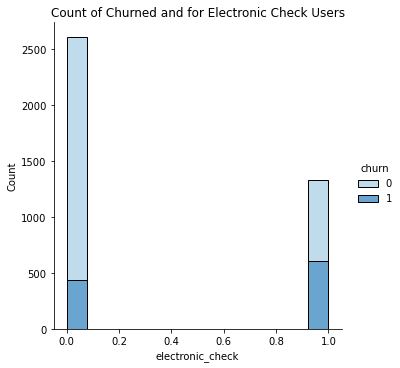

In [29]:
# visualize electronic check users that have churned
sns.displot(train, x="electronic_check",hue="churn", multiple='stack', palette="Blues")
plt.title('Count of Churned and for Electronic Check Users')

- For this I used the chi test because I was comparing 2 categorical variables (electronic check users and churn)
- **738** out of the **1,654** customers paying with electronic check churn
    - **44%**

# No Internet Service
- Do customers who sign on for no internet services churn mor than those who do?
- My Null Hypothesis is that "Paying with an electronic check and churn rate dont effect each other"
- My Alternative Hypothesis is that "Paying with an electronic check and chrun depend on each other"
    - because my correlation heatmap there is a negative correlation of -0.23, I am led to believe that the null hypothesis will be rejected.

In [30]:
observe = pd.crosstab(train.churn, train.no_internet, margins = True)
chi2, p, degf, expected = stats.chi2_contingency(observe)
        # observed: 0.83 - expected: 0.71
        # observed: 0.55 - expected: 0.71
        # observed: 0.74 - expected: 0.71
        # observed: 0.17 - expected: 0.29
        # observed: 0.44 - expected: 0.29
        # observed: 0.26 - expected: 0.29
        # p = 2.768
# Chi test is for catigorical vs catigorical
null_hypothesis = "Paying with an electronic check and churn rate dont effect each other"
alt_hypothesis = "Paying with an electronic check and chrun depend on each other"
alpha = .01 #my confident if 0.95 therfore my alpha is .05

if p < alpha:
    print("We reject the null hypothesis")
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("There is not enough evidence to move forward with the alternative") 

We reject the null hypothesis
We reject the hypothesis that Paying with an electronic check and churn rate dont effect each other


#### Above I can see I was correct ,  that we would reject the null hypothesis and accept that no internet service and churn are dependednt on each other.

Text(0.5, 1.0, 'Count of Churned and Customers without Internet')

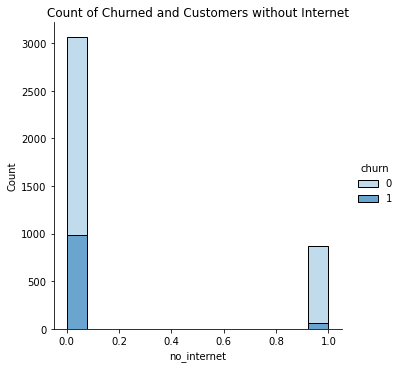

In [31]:
# visualize customers without internet that have churned
sns.displot(train, x="no_internet",hue="churn", multiple='stack', palette="Blues")
plt.title('Count of Churned and Customers without Internet')

- For this I used the **chi test** because I was comparing 2 categorical variables (no internet service and churn)
- **73** out of **1,061** customers with no internet churn
    - **7%**
        - *definatly as big of a driver compared to the others, but still important in predicting churn*

# Lets model these!
- lets start with splitting into train calidate and test!

In [94]:
# Used for in sample
X_train = train.drop(columns = ['churn'])
y_train = train.churn

# used for out of sample
X_validate = validate.drop(columns=['churn'])
y_validate = validate.churn

X_test = test.drop(columns=['churn'])
y_test = test.churn

# x is feature
# y is traget variable

In [95]:
# most of our customers are still with the company (0 = has not churned)
y_train.value_counts()
# So not churned is higher which means for my next steps in needs to be before churned

0    2891
1    1046
Name: churn, dtype: int64

In [96]:
# Setting up baseline accuracy
baseline_accuracy = (train.churn == 0).mean()
round(baseline_accuracy, 3)

0.734

### Let's stars with the Logistic Regression for the Model!

This model was chosen as my champion because with a baseline of **0.73** and a n accuracy of **0.8** none of the other models could rival it.

In [97]:
logit1 = LogisticRegression(random_state=123)
#the features we are using
features = ["monthly_charges", "tenure", 
            "fiber_optic", "electronic_check",
           "no_internet"]

# Fit a model using only these specified features
logit1.fit(X_train[features], y_train)

# Since we .fit on a subset, we .predict on that same subset of features
y_pred = logit1.predict(X_train[features])

print("Baseline is", round(baseline_accuracy, 3))
print('Accuracy of Logistic Regression: {:.2f}'
     .format(logit1.score(X_train[features], y_train)))

Baseline is 0.734
Accuracy of Logistic Regression: 0.80


In [36]:
print(classification_report(y_train, y_pred))
# accuracy of .8 looks good

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      2891
           1       0.66      0.49      0.56      1046

    accuracy                           0.80      3937
   macro avg       0.75      0.70      0.72      3937
weighted avg       0.79      0.80      0.79      3937



- There are four ways to check if the predictions are right or wrong:
    1. **TN / True Negative**: the case was negative and predicted negative
    2. **TP / True Positive**: the case was positive and predicted positive
    3. **FN / False Negative**: the case was positive but predicted negative
    4. **FP / False Positive**: the case was negative but predicted positive
- **Precision**
    - what percent of my predictions wer correct?
        - precision for not churned: **0.83**
        - precision for churned: **0.66**
- **Recall**
    - what percent of the postive cases did I catch?
        - recall for not churned: **0.91**
        - recall for churned: **0.49**
- **F1 score**
    - what percent of positive predictions were correct?
        - f1 score for not churned: **0.87**
        - f1 score for churned: **0.56**
    - what is the accuracy of the f1 score prediction?
        - **0.8**
        
        
#### This is better than my baseline so lets celebrate!

## Decision Tree Model!

In [85]:
features = ["monthly_charges", "tenure", 
            "fiber_optic", "electronic_check",
           "no_internet"]

# Make sure to sex max deph because it goes acts like it know everyhting the higher it gets
clf1 = DecisionTreeClassifier(max_depth=3)
    # 3 feels safe
    
# fit the model
clf1.fit(X_train[features], y_train)

# Lets preddict the churn
y_pred = clf1.predict(X_train[features])

# Now the probability of the churn above
y_pred_proba = clf1.predict_proba(X_train[features])

# Lets look at the accuracy of this Decision Tree Model
print('Accuracy of my Decision Tree Using in Sample data is', clf1.score(X_train[features], y_train))
print('\nThe Confusuon Matrix of the Decision Tree is::\n',confusion_matrix(y_train, y_pred))

print('\nThe Classification Report of the Decision Tree is:\n',classification_report(y_train, y_pred))

Accuracy of my Decision Tree Using in Sample data is 0.7802895605791211

The Confusuon Matrix of the Decision Tree is::
 [[2812   79]
 [ 786  260]]

The Classification Report of the Decision Tree is:
               precision    recall  f1-score   support

           0       0.78      0.97      0.87      2891
           1       0.77      0.25      0.38      1046

    accuracy                           0.78      3937
   macro avg       0.77      0.61      0.62      3937
weighted avg       0.78      0.78      0.74      3937



#### Still better than the baseline of 0.73! But, now we travel into the forest!

In [38]:
X_train2 = X_train[["monthly_charges", "tenure", 
            "fiber_optic", "electronic_check",
           "no_internet"]]
y_train2 = train.churn

# Set the random forests Max depth. I am choosing 3 and sticking too it!
rf = RandomForestClassifier(max_depth = 3)

# Make the random forest fit
rf.fit(X_train2, y_train2)

# Prediction time
y_pred2 = rf.predict(X_train2)

# Probability of Prediction above
y_pred_proba2 = rf.predict_proba(X_train2)

# Lets look at the accuracy of this Decision Tree Model
print('Accuracy of my Random Forest Using in Sample data is', rf.score(X_train2, y_train2))
print('\nThe Confusuon Matrix of the Decision Tree is::\n',confusion_matrix(y_train2, y_pred2))
print('\nThe Classification Report of the Decision Tree is:\n',classification_report(y_train2, y_pred2))

Accuracy of my Random Forest Using in Sample data is 0.7965455930911862

The Confusuon Matrix of the Decision Tree is::
 [[2725  166]
 [ 635  411]]

The Classification Report of the Decision Tree is:
               precision    recall  f1-score   support

           0       0.81      0.94      0.87      2891
           1       0.71      0.39      0.51      1046

    accuracy                           0.80      3937
   macro avg       0.76      0.67      0.69      3937
weighted avg       0.78      0.80      0.77      3937



In [84]:
# Set knn
knn = KNeighborsClassifier()

# Now let's fit the model!
knn.fit(X_train[features], y_train)

# Predictions
y_pred = knn.predict(X_train[features])

# Probability of the prediction above.
y_pred_proba = knn.predict_proba(X_train[features])

# Lets look at the accuracy of the KNN Model
print('Accuracy of my Random Forest Using in Sample data is', knn.score(X_train[features], y_train))
print('\nThe Confusuon Matrix of the Decision Tree is::\n',confusion_matrix(y_train, y_pred))
print('\nThe Classification Report of the Decision Tree is:\n',classification_report(y_train, y_pred))

Accuracy of my Random Forest Using in Sample data is 0.8351536703073407

The Confusuon Matrix of the Decision Tree is::
 [[2661  230]
 [ 419  627]]

The Classification Report of the Decision Tree is:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89      2891
           1       0.73      0.60      0.66      1046

    accuracy                           0.84      3937
   macro avg       0.80      0.76      0.78      3937
weighted avg       0.83      0.84      0.83      3937



# But do these models work with out of sample data?

### Validate Logistic Regression with Out of Sample Data

In [98]:
logit1 = LogisticRegression(random_state=123)
#the features we are using again are:
features = ["monthly_charges", "tenure", 
            "fiber_optic", "electronic_check",
           "no_internet"]

# Fit a model using only these specified features
logit1.fit(X_validate[features], y_validate)

# Since we .fit on a subset, we .predict on that same subset of features
y_pred = logit1.predict(X_validate[features])

print("Baseline is", round(baseline_accuracy, 3))
print('Accuracy of Logistic Regression: {:.2f}'
     .format(logit1.score(X_validate[features], y_validate)))

Baseline is 0.734
Accuracy of Logistic Regression: 0.80


#### Look at that!! Even with out of sample Data the logistic regression test comes back better that the baseline accuracy!

### Validate Decision Tree with Out of Sample Data

In [79]:
# Make sure to sex max deph because it goes acts like it know everyhting the higher it gets
clf1 = DecisionTreeClassifier(max_depth=3)
    # 3 feels safe
    
# fit the model
clf1.fit(X_validate[features], y_validate)

# Lets preddict the churn
y_pred = clf1.predict(X_validate[features])

# Now the probability of the churn above
y_pred_proba = clf1.predict_proba(X_validate[features])

# Lets look at the accuracy of this Decision Tree Model
print("Baseline is", round(baseline_accuracy, 3))
print('Accuracy of my Decision Tree Using Out of Sample data is', clf1.score(X_validate[features], y_validate))


Baseline is 0.734
Accuracy of my Decision Tree Using Out of Sample data is 0.798862828713575


#### Still better than the baseline!

### Validate Random Forest with Out of Sample Data

In [42]:
X_validate2 = X_validate[["monthly_charges", "tenure", 
            "fiber_optic", "electronic_check",
           "no_internet"]]
y_validate2 = validate.churn

# Set the random forests Max depth. I am choosing 3 and sticking too it!
rf = RandomForestClassifier(max_depth = 3)

# Make the random forest fit
rf.fit(X_validate2, y_validate2)

# Prediction time
y_pred2 = rf.predict(X_validate2)

# Probability of Prediction above
y_pred_proba2 = rf.predict_proba(X_validate2)

# Lets look at the accuracy of this Decision Tree Model
print("Baseline is", round(baseline_accuracy, 3))
print('Accuracy of my Random Forest Using in Sample data is', rf.score(X_validate2, y_validate2))


Baseline is 0.734
Accuracy of my Random Forest Using in Sample data is 0.8002842928216063


#### Better than the baseline!

### Validate KNN with Out of Sample Data

In [77]:
# Set knn
knn = KNeighborsClassifier()

# Now let's fit the model!
knn.fit(X_validate[features], y_validate)

# Predictions
y_pred = knn.predict(X_validate[features])

# Probability of the prediction above.
y_pred_proba = knn.predict_proba(X_validate[features])

# Lets look at the accuracy of the KNN Model
print("Baseline is", round(baseline_accuracy, 3))
print('Accuracy of KNN', knn.score(X_train[features], y_train))


Baseline is 0.734
Accuracy of KNN 0.7696215392430785


Logistic Regression is the best model out of all of them!

- Here is the proof:
    - Baseline is 0.734
        - Accuracy of Logistic Regression: 0.80
        - Accuracy of Decision Tree: 0.798
        - Accuracy of Random Forest: 0.798
        - Accuracy of KNN: 0.769

### What should we do with the new information?

# Make a CSV to share with you all!

In [75]:
# Columns is the features that I used in my model
features = ["monthly_charges", "tenure", 
            "fiber_optic", "electronic_check",
           "no_internet"]

# Use logit 1 to predict test data
y_pred = logit1.predict(X_test[features])
y_proba = logit1.predict_proba(X_test[features])

cut_customer_ids = X_test.customer_id

output = pd.DataFrame(y_proba)
    # 0 is th pred of no
    # 1 is the percentage chance of churn

output.columns = ['NotChurnedProbability', 'ChurnedProbability']
output['predictions'] = y_pred
output.index = cut_customer_ids

#print(y_proba)
output.to_csv('chrun_prediction.csv')


# In Conclusion
- To see correlation I decided to go with a heatmap to see the correlation between each column.
    - In the correlation heatmap:
        - the darked the color the stronger the correlation is
        - the lighter the color the weaker the correlation is
- I chose to work with the 5 columns based on the the largest correlation with churn, weither that be in an upward or downward slope.
- The features with the highest correlation to churn are:
    - `monthly_charges`
        - with a positive correlation of: 0.2
        - this is a continous feature
    - `tenure`
        - wiht a negative correlation of: -0.35
        - this is a continous featue
    - `fiber_optic`
        - with a positive correlation of : 0.31
        - this is a categorical feature
    - `electronic_check`
        - with a positive correlation of: 0.3
        - this is a categorical feature
    - `no_internet`
        - wiht a negative correlation of: -.23
        - this is a categorical feature
- There is a **spike** in churn once monthly rates hit 70 dollars per month and drop back off again at about 110 dollars per month
- There is a significantly higher amount of customers who churn in the **first 10 months** of services versus any other level of tenure.
- **905** out of **2,170** customers with fiber optics churn
    - **41.7%** of fiber optic custoemrs.
    - Fiber optic customers pay between **70 and 100 a month**.
        - Which is where our churn spikes in our monthly charges.
- **738** out of the **1,654** customers paying with electronic check churn
    - 44%
- **73** out of **1,061** customers with no internet churn
    - **7%**
        - *definatly as big of a driver compared to the others, but still important in predicting churn*
- Out of all the models the best model was that of Logistic regression.
    - with a accuracy of **0.8** when the baseline was **0.73**
        - Which stood through in sample and out of sample data.